In [35]:
import numpy as np
import docx2txt
import matplotlib.pyplot as plt
import pandas as pd
import string
import re
%matplotlib inline
alphabets = list(string.ascii_lowercase)

In [36]:
# define a function that create our matrix as a dataframe,
# where the rows represents the current state or
# our current letter and the coulmuns represent the
# transitional state or the next letter:

def create_df(result):
    alphabets = list(string.ascii_lowercase)
    df=np.zeros((26,26))
    df=pd.DataFrame(df)
    df['alphabets']=alphabets
    df.set_index('alphabets', inplace=True) 
    df.columns=[alphabets]
    df.rows=[alphabets]
    
    count=0
    index_row=[]
    index_column=[]
    text=filtering(result)
    for i in (text[0:len(text)-1]):
        if i !=' ':
            if count !=len(text)-2:
                now=index(i)
                count+=1
    
                for j in (text[count:]):
                    if j!=' ' :
                        next=index(j)
                        index_row+=[now]
                        index_column+=[next]
                        break
                    break
        else:
            count+=1
        
    for i in range(len(index_row)):
        df.iloc[index_row[i],index_column[i]]+=1
    return (df,text)

# filtering our documents:

create a fucntion that would filter out the text we feed to it, and return a clean text without any special or capital letters. in addition, assume that it doesn't read spaces between words. that it it will return a whole text with no spaces.

In [37]:
def filtering(result):
    t =result
    l=['0','1','2','3','4','5','6','7','8','9']
    text=''
    for i in t:
        if i not in l:
            text+=i
        
    text=text.lower()
    return text


# letters indexing:
as we move forward with our notebook, we will need at some point to index the letters and get their position in repsect to the alphabet arrangement, so let's create such a function that would give us for each index, is corresponding letter.

In [38]:
def index(letter):
  ind={'a':1,'b':2,'c':3,'d':4,'e':5,'f':6,'g':7,'h':8,'i':9,'j':10,'k':11,'l':12,'m':13,'n':14,'o':15,'p':16,'q':17,'r':18,'s':19,'t':20,'u':21,'v':22,'w':23,'x':24,'y':25,'z':26}

  return int(ind[letter]-1)

# Normalizing:
to get the correct probabilities we will need to noemalize our data, where for each state of transition we need to find the total number of occurance of the current letter at which our state is at(e.g: state ab, will find the number of occurance of a in the text).

Now, create a function that will take in a non-normalized dataframe, and return a normalized one.

In [40]:
def normalize(df,text): 
    dff=df
    proba_letter=np.zeros(26)
    for i in text:
        if i!=' ':
            get_index=index(i)
            proba_letter[get_index]+=1
    

    for i in range(26):
        if proba_letter[i]!=0:
            dff.iloc[i,:]=round(df.iloc[i,:]/proba_letter[i],5)
    
    return dff

In [92]:
# let's first analyse a 1000 word essay:
result=docx2txt.process('1000_words.docx')
res = []
for sub in result:
    res.append(sub.replace("\n", " "))
df,text=create_df(res)
# normalize:
normalized_df=normalize(df,text)
normalized_df

C:\Users\Abu El Bish\AppData\Local\Temp\ipykernel_27184\161341055.py:13: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  df.rows=[alphabets]


,a,b,c,d,e,f,g,h,i,j,...,q,r,s,t,u,v,w,x,y,z
alphabets,,,,,,,,,,,,,,,,,,,,,
a,0.00000,0.02467,0.06086,0.05263,0.00000,0.01151,0.00987,0.00164,0.01974,0.00164,...,0.0,0.13158,0.08553,0.10855,0.00658,0.03454,0.00987,0.00000,0.00987,0.00000
b,0.08065,0.00000,0.00000,0.00000,0.38710,0.00000,0.00000,0.00000,0.03226,0.00000,...,0.0,0.04839,0.04839,0.00000,0.04839,0.00000,0.00000,0.00000,0.08065,0.00000
c,0.08811,0.00000,0.01762,0.00000,0.22467,0.00000,0.00000,0.18502,0.07489,0.00000,...,0.0,0.03524,0.00441,0.07048,0.04846,0.00000,0.00000,0.00000,0.00000,0.00000
d,0.07424,0.00000,0.00000,0.04367,0.28821,0.00000,0.00000,0.00000,0.12664,0.00437,...,0.0,0.04803,0.01310,0.00000,0.01310,0.00000,0.00000,0.00000,0.00873,0.00000
e,0.08180,0.00346,0.01498,0.03687,0.01382,0.00806,0.00461,0.00230,0.01959,0.00000,...,0.0,0.09793,0.14286,0.01843,0.00000,0.00922,0.00576,0.01382,0.00691,0.00000
f,0.15152,0.00000,0.00000,0.00000,0.15909,0.06061,0.00000,0.00000,0.08333,0.00000,...,0.0,0.02273,0.00758,0.03788,0.03788,0.00000,0.00000,0.00000,0.00000,0.00000
g,0.02055,0.00000,0.00000,0.00000,0.08219,0.00000,0.00685,0.20548,0.06164,0.00000,...,0.0,0.04110,0.01370,0.00000,0.01370,0.00000,0.00000,0.00000,0.00000,0.00000
h,0.14516,0.00000,0.00000,0.00000,0.42857,0.00000,0.00000,0.00000,0.08295,0.00000,...,0.0,0.02995,0.00000,0.02074,0.00000,0.00000,0.00000,0.00000,0.00922,0.00000
i,0.02893,0.01085,0.08318,0.02532,0.05063,0.01989,0.02532,0.00000,0.00000,0.00000,...,0.0,0.02893,0.09403,0.14105,0.00000,0.05425,0.00000,0.00000,0.00000,0.00904


In [93]:
# 150000 words text
result1=docx2txt.process('150000_words.docx')
res1 = []
result1 = re.sub('[^a-zA-Z0-9 \n\.]', '', result1)
for sub in result1:
    res1.append(sub.replace("\n", " "))
df1,text1=create_df(res1)
# normalize:
normalized_df1=normalize(df1,text1)
normalized_df1

C:\Users\Abu El Bish\AppData\Local\Temp\ipykernel_27184\161341055.py:13: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  df.rows=[alphabets]


,a,b,c,d,e,f,g,h,i,j,...,q,r,s,t,u,v,w,x,y,z
alphabets,,,,,,,,,,,,,,,,,,,,,
a,0.00016,0.02276,0.03584,0.05044,0.00058,0.00718,0.01562,0.00222,0.04256,0.00042,...,0.00007,0.09046,0.09644,0.13772,0.01023,0.02101,0.00899,0.00051,0.02560,0.00134
b,0.08076,0.00494,0.00000,0.00126,0.32797,0.00000,0.00000,0.00021,0.03649,0.01052,...,0.00000,0.06088,0.02639,0.00673,0.14648,0.00358,0.00000,0.00000,0.06309,0.00000
c,0.12343,0.00000,0.01381,0.00017,0.18372,0.00000,0.00006,0.17496,0.06865,0.00000,...,0.00261,0.03319,0.00470,0.07822,0.03128,0.00000,0.00000,0.00000,0.00609,0.00000
d,0.02641,0.00065,0.00007,0.01121,0.11357,0.00083,0.00393,0.00169,0.07873,0.00036,...,0.00014,0.02666,0.02508,0.00083,0.01286,0.00216,0.00054,0.00000,0.02137,0.00000
e,0.04258,0.00145,0.02100,0.07141,0.02529,0.00875,0.00658,0.00217,0.01114,0.00036,...,0.00171,0.14016,0.07354,0.02730,0.00094,0.02625,0.00734,0.01512,0.01267,0.00011
f,0.07719,0.00021,0.00056,0.00049,0.10498,0.04857,0.00021,0.00007,0.07198,0.00014,...,0.00000,0.07149,0.00208,0.03286,0.04461,0.00000,0.00007,0.00000,0.00201,0.00000
g,0.05649,0.00015,0.00007,0.00029,0.11422,0.00007,0.00864,0.12177,0.05642,0.00000,...,0.00000,0.05250,0.01808,0.00232,0.02251,0.00000,0.00051,0.00000,0.00712,0.00000
h,0.16135,0.00037,0.00016,0.00023,0.45690,0.00058,0.00000,0.00005,0.14581,0.00000,...,0.00000,0.00838,0.00233,0.02597,0.01231,0.00051,0.00033,0.00000,0.00763,0.00000
i,0.01871,0.00846,0.05000,0.04498,0.03606,0.02214,0.02460,0.00064,0.00034,0.00014,...,0.00038,0.03016,0.12818,0.14416,0.00054,0.02675,0.00000,0.00081,0.00002,0.00473


In [105]:
result2=docx2txt.process('250000_words.docx')
res2 = []
result2 = re.sub('[^a-zA-Z0-9 \n\.]', '', result2)
for sub in result2:
    res2.append(sub.replace("\n", " "))
df2,text2=create_df(res2)
normalized_df2=normalize(df2,text2)
normalized_df2

C:\Users\Abu El Bish\AppData\Local\Temp\ipykernel_27184\161341055.py:13: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  df.rows=[alphabets]


,a,b,c,d,e,f,g,h,i,j,...,q,r,s,t,u,v,w,x,y,z
alphabets,,,,,,,,,,,,,,,,,,,,,
a,0.00012,0.02157,0.03243,0.05554,0.00041,0.00698,0.01586,0.00197,0.04453,0.00028,...,0.00004,0.08345,0.09780,0.13720,0.00968,0.02020,0.01085,0.00041,0.02777,0.00200
b,0.07954,0.00490,0.00000,0.00102,0.33711,0.00000,0.00000,0.00013,0.03109,0.00903,...,0.00000,0.06434,0.02085,0.00928,0.15571,0.00439,0.00000,0.00000,0.06027,0.00000
c,0.12239,0.00000,0.01296,0.00011,0.17904,0.00000,0.00004,0.18857,0.06116,0.00000,...,0.00236,0.03198,0.00347,0.07689,0.03161,0.00000,0.00000,0.00000,0.00702,0.00000
d,0.02481,0.00086,0.00008,0.01011,0.10667,0.00084,0.00331,0.00188,0.07358,0.00023,...,0.00010,0.03371,0.02324,0.00067,0.01160,0.00207,0.00046,0.00000,0.01862,0.00000
e,0.04331,0.00119,0.01980,0.07385,0.02687,0.00886,0.00659,0.00207,0.01051,0.00029,...,0.00144,0.13793,0.06923,0.02668,0.00076,0.02760,0.00716,0.01743,0.01475,0.00020
f,0.07318,0.00017,0.00056,0.00069,0.10848,0.04803,0.00017,0.00004,0.07095,0.00009,...,0.00000,0.07082,0.00227,0.03359,0.04194,0.00000,0.00043,0.00000,0.00197,0.00000
g,0.05625,0.00021,0.00013,0.00030,0.10962,0.00009,0.00816,0.12538,0.05187,0.00000,...,0.00000,0.05110,0.01816,0.00266,0.02065,0.00000,0.00039,0.00000,0.00541,0.00000
h,0.16625,0.00042,0.00011,0.00015,0.44842,0.00069,0.00000,0.00007,0.15359,0.00000,...,0.00000,0.00790,0.00344,0.02678,0.01167,0.00038,0.00030,0.00000,0.00688,0.00000
i,0.01792,0.00794,0.04453,0.04935,0.03261,0.02217,0.02404,0.00074,0.00022,0.00009,...,0.00027,0.02923,0.12243,0.14606,0.00044,0.02657,0.00000,0.00096,0.00001,0.00390


the above functions have helped us to see when we can reach the equilibrium state and that's all we need from the above funcions, since they don't work efficiently on cases with special letters. so, we will now take a one definite text with everything included( specail characters, numbers and spaces) and consider it for the rest of the notebook, while we will apply on it the below functions:

In [94]:
def transitions_counts(text):
    #akes .txt file and creates a dictionary with two-letter combinations as keys and their counts as values.
    
    trans_counts = {}
    
    chars = ['A','B','C','D','E','F','G','H','I','J','K','L','M','N','O','P','Q','R','S','T','U','V','W','X','Y','Z']
    
    file = open(text)
    
    w = []
    
    for line in file:
        
        w.append(line)
        
    file.close()
    
    for line in w:
        line = str.upper(line) # will convert to upper case
        line = line[0:len(line)-1] # this is to remove the \n newline characters at the end of the line 
        
        for i in range(len(line)-1): #get the number of two letter pairs   
            twoletter_key = line[i] + line[i+1]
            
            #two consecutive letters
            if (line[i] in chars) and (line[i+1] in chars):
                if twoletter_key not in trans_counts: 
                    trans_counts[twoletter_key] = 1
                else: 
                    trans_counts[twoletter_key] += 1
                    
                    
            #letter followed by a non-letter
            elif (line[i] in chars) and (line[i+1] not in chars):
                twoletter_key = line[i] + " "
                if twoletter_key not in trans_counts: 
                    trans_counts[twoletter_key] = 1
                else: 
                    trans_counts[twoletter_key] += 1
                    
            #non-letter followed by a letter
            elif (line[i] not in chars) and (line[i+1] in chars):
                twoletter_key = " " + line[i+1]
                if twoletter_key not in trans_counts: 
                    trans_counts[twoletter_key] = 1
                else: 
                    trans_counts[twoletter_key] += 1
                    
            #two non-letters characters:
            elif (line[i] not in chars) and (line[i+1] not in chars):
                twoletter_key = " " + " "
                if twoletter_key not in trans_counts: 
                    trans_counts[twoletter_key] = 1
                else: 
                    trans_counts[twoletter_key] += 1
                    
    return trans_counts

In [95]:
def mapped(key):
    #take a encryption or decryption key, returns a dictionary where the dictionary key is the letter from the key
    #and the value is the letter of the alphabet.
    alphabet = ['A','B','C','D','E','F','G','H','I','J','K','L','M','N','O','P','Q','R','S','T','U','V','W','X','Y','Z']
    map_to = {}
    for i in range(len(key)): map_to[alphabet[i]] = key[i]
    return map_to

In [96]:
def apply_key(key, text):
    #encodes/decodes text given a de/encryption key (a sequence of 26 letters) and a string of text
    #returns a new text (string)
    mapped_text = ""
    #convert the text to a list
    text = list(text)
    #get the mapping from mapped
    mapping = mapped(key)
    #apply the mapping based on the key
    for letter in text:
        #convert to upper case
        letter = str.upper(letter)
        if letter in mapping: mapped_text += mapping[letter]
        else: mapped_text += " "
    return mapped_text

In [114]:
def weight(key, text, trans_counts):
    #calculates the weight of a decryption key based on it's log, to make it smaller and easier to see, to the referece text transition counts.
   # Returns a weight value (float)
    #get the current mapping
    mapping = mapped(key)
    #decode the text based on the mapping
    decoded = apply_key(key, text)
    key_weight = 0
    target_counts = {}
    chars = ['A','B','C','D','E','F','G','H','I','J','K','L','M','N','O','P','Q','R','S','T','U','V','W','X','Y','Z']
    #strip the text
    stripped_text = decoded.strip()
    #convert the target text into a list of characters
    text_list = list(stripped_text)
    #count the number of two letter pairs in the target text
    for i in range(len(text_list)-1):
        twoletter_key = text_list[i] + text_list[i+1]
        #two consecutive letters
        if (text_list[i] in chars) and (text_list[i+1] in chars):
            if twoletter_key not in target_counts: target_counts[twoletter_key] = 1
            else: target_counts[twoletter_key] += 1
        #non-letter followed by a letter
        elif (text_list[i] not in chars) and (text_list[i+1] in chars):
            twoletter_key = " " + text_list[i+1]
            if twoletter_key not in target_counts: target_counts[twoletter_key] = 1
            else: target_counts[twoletter_key] += 1
        #letter followed by a non-letter
        elif (text_list[i] in chars) and (text_list[i+1] not in chars):
            twoletter_key = text_list[i] + " "
            if twoletter_key not in target_counts: target_counts[twoletter_key] = 1
            else: target_counts[twoletter_key] += 1
        #two non-letters
        elif (text_list[i] not in chars) and (text_list[i+1] not in chars):
            twoletter_key = " " + " "
            if twoletter_key not in target_counts: target_counts[twoletter_key] = 1
            else: target_counts[twoletter_key] += 1
    for z,g in target_counts.items():
        if z in trans_counts:
            key_weight += g*math.log(trans_counts[z])
    return key_weight

In [113]:
def get_proposed_key(key):
    #will encypt the text( swapping two letters radnomly)
    proposed_key = ""
    chars = ['A','B','C','D','E','F','G','H','I','J','K','L','M','N','O','P','Q','R','S','T','U','V','W','X','Y','Z']
    #randomly select two letters to swap
    char1, char2 = np.random.choice(chars, size=2, replace=False)
    #create a new key, swapping letters in the old key
    new_key = list(key)
    for i in range(len(new_key)):
        if new_key[i] == char1: index1 = i
        if new_key[i] == char2: index2 = i
    new_key[index1] = char2
    new_key[index2] = char1
    for letter in new_key:
        proposed_key += letter
    return proposed_key

Main code

In [108]:
trans_counts = transitions_counts('text.txt')


In [115]:
target_text=' wake up to reality, nothing ever goes as planned in this accursed world. The longer you live, the more you will realize that the only thing that truly exist in this reality are merely suffering, pain and fertility futility. Everywhere you look in this world, wherever there is light, there is always shadows to be found as well.'
print(len(target_text),'encrypted letters have been used')
alphabet = "ABCDEFGHIJKLMNOPQRSTUVWXYZ"

#generate a random encryption key
chars = ['A','B','C','D','E','F','G','H','I','J','K','L','M','N','O','P','Q','R','S','T','U','V','W','X','Y','Z']
encr_list = list(np.random.choice(chars, size=26, replace=False))
encrypt_key = ""
for i in encr_list:
    encrypt_key = encrypt_key + i
encrypt_test ="abcdefghijklmnopqrstuvwxyz"
test_key = apply_key(encrypt_key, encrypt_test)

329 encrypted letters have been used


In [110]:
#encrypt the target text
enc_text = apply_key(encrypt_key, target_text)

In [111]:
#generate a random decryption key
decrypt_list = list(np.random.choice(chars, size=26, replace=False))
current_decrypt_key = ""
for i in decrypt_list:
    current_decrypt_key = current_decrypt_key + i
    
# define a set to save the number of correct letters guessed and another to save the number of letters used
# this list will be updated in the same cell below every time we change the 

In [ ]:
#Results!

print('Normal text:\n', target_text)
print('\nEncrypted text:\n', enc_text)
print('\n')

for iters in range(20001):
    proposed_decrypt_key = get_proposed_key(current_decrypt_key)
    current_weight = weight(current_decrypt_key, enc_text, trans_counts)
    proposed_weight = weight(proposed_decrypt_key, enc_text, trans_counts)

    #calculate the acceptance probability based on the ratio of the proposed and current weights
    ap = min(1, math.exp(proposed_weight - current_weight))

    #generate a random number between 0 and 1
    r_unif = np.random.uniform()

    #accept the proposed key only if the random number is less than the probability of acceptance
    if r_unif >= ap: accept_proposed_key = False
    else: accept_proposed_key = True
    if accept_proposed_key: current_decrypt_key = proposed_decrypt_key

    #print every 1000th iteration
    if iters%500 == 0:
        print('Iter:', iters, apply_key(current_decrypt_key, enc_text)[0:99])
        test = apply_key(encrypt_key, alphabet)
        check = apply_key(current_decrypt_key, test)
        correct = 0
        for i in range(len(alphabet)):
            if alphabet[i] == check[i]: correct += 1
        #print('Number of correctly decoded letters:', correct)

print('\nDecrypted text:')
print(apply_key(current_decrypt_key, enc_text))

#get number of correct letters
test = apply_key(encrypt_key, alphabet)
check = apply_key(current_decrypt_key, test)
correct = 0
for i in range(len(alphabet)):
    if alphabet[i] == check[i]: correct += 1
print('\n')
#print(alphabet)
#print(check)
print('Number of correctly decoded letters:', correct)


Normal text:
  wake up to reality, nothing ever goes as planned in this accursed world. The longer you live, the more you will realize that the only thing that truly exist in this reality are merely suffering, pain and fertility futility. Everywhere you look in this world, wherever there is light, there is always shadows to be found as well.

Encrypted text:
  LQGB ZS RV PBQTJRF  OVRXJOM BKBP MVBI QI STQOOBU JO RXJI QDDZPIBU LVPTU  RXB TVOMBP FVZ TJKB  RXB AVPB FVZ LJTT PBQTJCB RXQR RXB VOTF RXJOM RXQR RPZTF BHJIR JO RXJI PBQTJRF QPB ABPBTF IZYYBPJOM  SQJO QOU YBPRJTJRF YZRJTJRF  BKBPFLXBPB FVZ TVVG JO RXJI LVPTU  LXBPBKBP RXBPB JI TJMXR  RXBPB JI QTLQFI IXQUVLI RV WB YVZOU QI LBTT 


Iter: 0  WAKE UP TO REALITY  NOTHING EVER GOES AS PLANNED IN THIS ABBURSED WORLD  THE LONGER YOU LIVE  THE 
Iter: 500  WAME UP TO REALITY  NOTHING EVER GOES AS PLANNED IN THIS AFFURSED WORLD  THE LONGER YOU LIVE  THE 
Iter: 1000  WAFE UB TO REALITY  NOTHING EVER GOES AS BLANNED IN THIS APPURSED WORLD  THE

Now since we need to do many iterations for many text lengths, we will try to use 8 different text lengths and see how the number of correctly guessed letter changes accordingly

In [24]:
target_text1='I will keep moving forward, untill i get destroy everython on my way'
target_text2='be alone that we ideas come from, be alone that the secret of inventions. i do not know what weapons will be used in ww3 but ww4 will be with bricks and stones'
target_text3='wake up to reality, nothing ever goes as planned in this accursed world. The longer you live, the more you will realize that the only thing that truly exist in this reality are merely suffering, pain and fertility futility. Everywhere you look in this world, wherever there is light, there is always shadows to be found as well.'
target_text4='Every human being relies on and is bounded by his knowledge and experience to live. This is what we call reality. However, knowledge and experience are ambiguous, thus reality can become illusion. Is it not possible to think that, all human beings are living in their assumptions. someones reality might be others illusion, and someones illusion might be the ultimate reality for another.people live their lives bound by what they accept as correct and true... that is how they define reality. But what does it mean to be correct or true? Merely vague concepts... their reality may all be an illusion.'
target_text5= 'wake up to reality, nothing ever goes as planned in this accursed world. The longer you live, the more you will realize that the only thing that truly exist in this reality are merely suffering, pain and fertility futility. Everywhere you look in this world, wherever there is light, there is always shadows to be found as well.As long as there is a concept of victors, the vanquished will also exist. The selfish intent, of wanting to preserve peac, initite wars, and hatred is born in order to protect love. There are nexesus causal relationships that cannot be seperated. I want to sever the fate of this world,a  world with only peace, a world with only victors, a world of only love.'
target_text6='Hear me, Subjects of Ymir. My name is Eren Yeager. Im adressing my fellow Subjects of Ymir, speaking to you directly through the power of the Founder. All the walls on the island of Paradis have crumbled to the ground, and the legions of Titans burried with in have begun their march. My only goal is to protect the lives of the people of Paradis the island where I was born.Right now, the nations of the world are united in the desire to exterminate my people. It wont end with our island. They wont be satsified until every last Subject of Ymir is dead. I wont let them have their way. The Titans of the walls, will continue their march until every trace of life beyond our shores is trampled flat, and the people of Paradis are all that remains of humanity. I will keep oving forward, untill I kill all my enemies'
target_text7='Everything that you thought had meaning: every hope, dream, or moment of happiness. None of it matters as you lie bleeding out on the battlefield. None of it changes what a speeding rock does to a body, we all die. But does that mean our lives are meaningless? Does that mean that there was no point in our being born? Would you say that of our slain comrades? What about their lives? Were they meaningless?... They were not! Their memory serves as an example to us all! The courageous fallen! The anguished fallen! Their lives have meaning because we the living refuse to forget them! And as we ride to certain death, we trust our successors to do the same for us! Because my soldiers do not buckle or yield when faced with the cruelty of this world! My soldiers push forward! My soldiers scream out! My soldiers!'
target_text8='The more ponderous ripples generated by inspiralling and colliding supermassive black holes, in the range of millions to billions of times the mass of the Sun, are in a frequency range too low for our current observatories. Still, the merger of a pair of supermassive black holes would be a freaking sweet thing to observe. Even without a detector capable of sensing low frequency gravitational waves, scientists expect to see an immense outburst of light across the spectrum.The data packed into that outburst could tell us so much about how these events play out. Were not entirely sure how supermassive black holes get so big, but there are a few clues to suggest that one mechanism is binary mergers. We know that galaxies have supermassive black holes in their centers, and weve observed not just pairs and groups of galaxies colliding, but supermassive black holes circling each other in mutual, decaying orbits in the centers of these post-merger galaxies. These are inferred from oscillations in the light emitted from the galactic center of these galaxies, on regular timescales that suggest an orbit.This brings us back to . Earlier this year, a team of astronomers led by Ning Jiang of the University of Science and Technology of China uploaded a paper to preprint server arXiv, describing some really strange behavior. Over a period of three years, the oscillations in the galactic nucleus grew shorter and shorter, from a time period of about a year, down to just one month'

all_texts=[target_text1,target_text2,target_text3,target_text4,target_text5,target_text6,target_text7,target_text8]




In [26]:
correct_guess=[]
number_of_letters=[]

for target_text in all_texts:
    enc_text = apply_key(encrypt_key, target_text)
    decrypt_list = list(np.random.choice(chars, size=26, replace=False))
    current_decrypt_key = ""
    for i in decrypt_list:
        current_decrypt_key = current_decrypt_key + i
    
    for iters in range(20001):
        proposed_decrypt_key = get_proposed_key(current_decrypt_key)
        current_weight = weight(current_decrypt_key, enc_text, trans_counts)
        proposed_weight = weight(proposed_decrypt_key, enc_text, trans_counts)

    #calculate the acceptance probability based on the ratio of the proposed and current weights
        ap = min(1, math.exp(proposed_weight - current_weight))

    #generate a random number between 0 and 1
        r_unif = np.random.uniform()

    #accept the proposed key only if the random number is less than the probability of acceptance
        if r_unif >= ap: accept_proposed_key = False
        else: accept_proposed_key = True
        if accept_proposed_key: current_decrypt_key = proposed_decrypt_key

    #print every 1000th iteration
        if iters%500 == 0:
            
            test = apply_key(encrypt_key, alphabet)
            check = apply_key(current_decrypt_key, test)
            correct = 0
            for i in range(len(alphabet)):
                if alphabet[i] == check[i]: correct += 1
                    
    #get number of correct letters
    test = apply_key(encrypt_key, alphabet)
    check = apply_key(current_decrypt_key, test)
    correct = 0
    for i in range(len(alphabet)):
        if alphabet[i] == check[i]: 
            correct += 1
            
    correct_guess+=[correct]
    number_of_letters+=[len(target_text)]
    print('for ',len(target_text),'we have:',correct,'guessed letters')


for  68 we have: 1 guessed letters
for  159 we have: 1 guessed letters
for  328 we have: 12 guessed letters
for  601 we have: 24 guessed letters
for  688 we have: 22 guessed letters
for  816 we have: 26 guessed letters
for  814 we have: 19 guessed letters
for  1486 we have: 26 guessed letters


OverflowError: math range error

# please ignore the math range error, it was due to a typo mistake, but re running the above cell will take another 2 hours and will be time consuming, so i kept it as it is, while i fixed the bug.

C:\Users\Abu El Bish\AppData\Local\Temp\ipykernel_27184\376181991.py:6: RuntimeWarning: divide by zero encountered in log
  new_y=y[0]*np.log(x_data)+y[1]


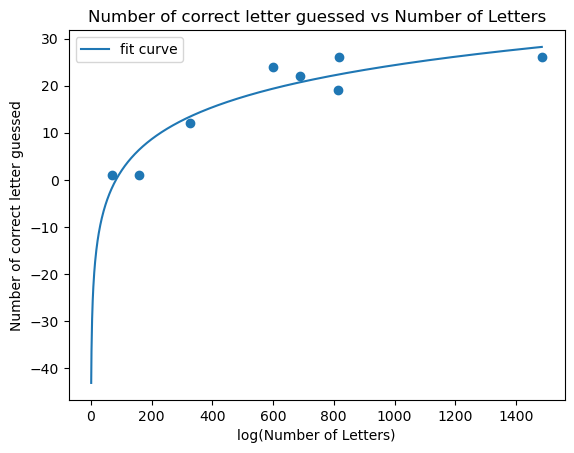

In [90]:
# from previous we see that:
correct_guess=[1,1,12,24,22,26,19,26] # number of correct guesses
number_of_letters=[68,159,328,601,688,816,814,1486] # number of letters used each time
y=np.polyfit(np.log(number_of_letters), correct_guess, 1)
x_data=np.arange(0,1486,1)
new_y=y[0]*np.log(x_data)+y[1]
plt.scatter(number_of_letters,correct_guess)
plt.xlabel('log(Number of Letters)')
plt.ylabel('Number of correct letter guessed')
plt.plot(x_data,new_y,label='fit curve')
plt.title('Number of correct letter guessed vs Number of Letters')
plt.legend()

# Notes:
if we want to do a fit for our data, we can notice that it may be following an exponential growth. so we will try to fith them based on this


In [89]:
def get_expected_length(number_guessed):
    number_of_letters_needed=(number_guessed-y[1])/y[0]
    return number_of_letters_needed
# note that this will give us the log of the actual number  then we need to find its exponential to get the real number of 
# words needed:
log_number=get_expected_length(26)
actual_number=np.exp(log_number)
print('inorder to correctly guess the whole 26 alphabets, we need a total of approximately:', round(actual_number),'letters')

inorder to correctly guess the whole 26 alphabets, we need a total of approximately: 1183 letters


looking back to our results of analysing the 8 texts, we can say that it actually make sense to, since we were able to get the 26 correct guesses by using almost 1400 letter. Therefore, our analysis is consistent.